In [7]:
import pandas as pd
import numpy as np
import os
import math
import seaborn as sns
from matplotlib import pyplot as plt
import sklearn.preprocessing as preprocessing
print(os.path.abspath('../'))

/home/admin1/Dropbox/MyFolder/data_analyst_course


In [8]:
# set the path where you have downloaded the data files
file_path = os.path.abspath('../2/')
print(file_path)
train = pd.read_csv(file_path+'/train_income_data_AAII.csv')
test = pd.read_csv(file_path+'/test_income_data_AAII.csv')
# For windows, if the above paths doesn't works
# import os
# f_path = os.path.join(*['C:', 'Users', 'user', 'Desktop', 'train_income_data_AAII.csv'])
# train = pd.read_csv(f_path)

/home/admin1/Dropbox/MyFolder/data_analyst_course/2


In [9]:
train.dtypes

ID                 int64
Age                int64
Workclass         object
Education         object
Marital.Status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Hours.Per.Week     int64
Native.Country    object
Income.Group      object
dtype: object

In [10]:
train.shape

(32561, 12)

## Plot the counts of each attribute

Number of rows for Subplots are :  3
0    ID
1    Age
2    Workclass
3    Education
4    Marital.Status
5    Occupation
6    Relationship
7    Race
8    Sex
9    Hours.Per.Week
10    Native.Country
11    Income.Group


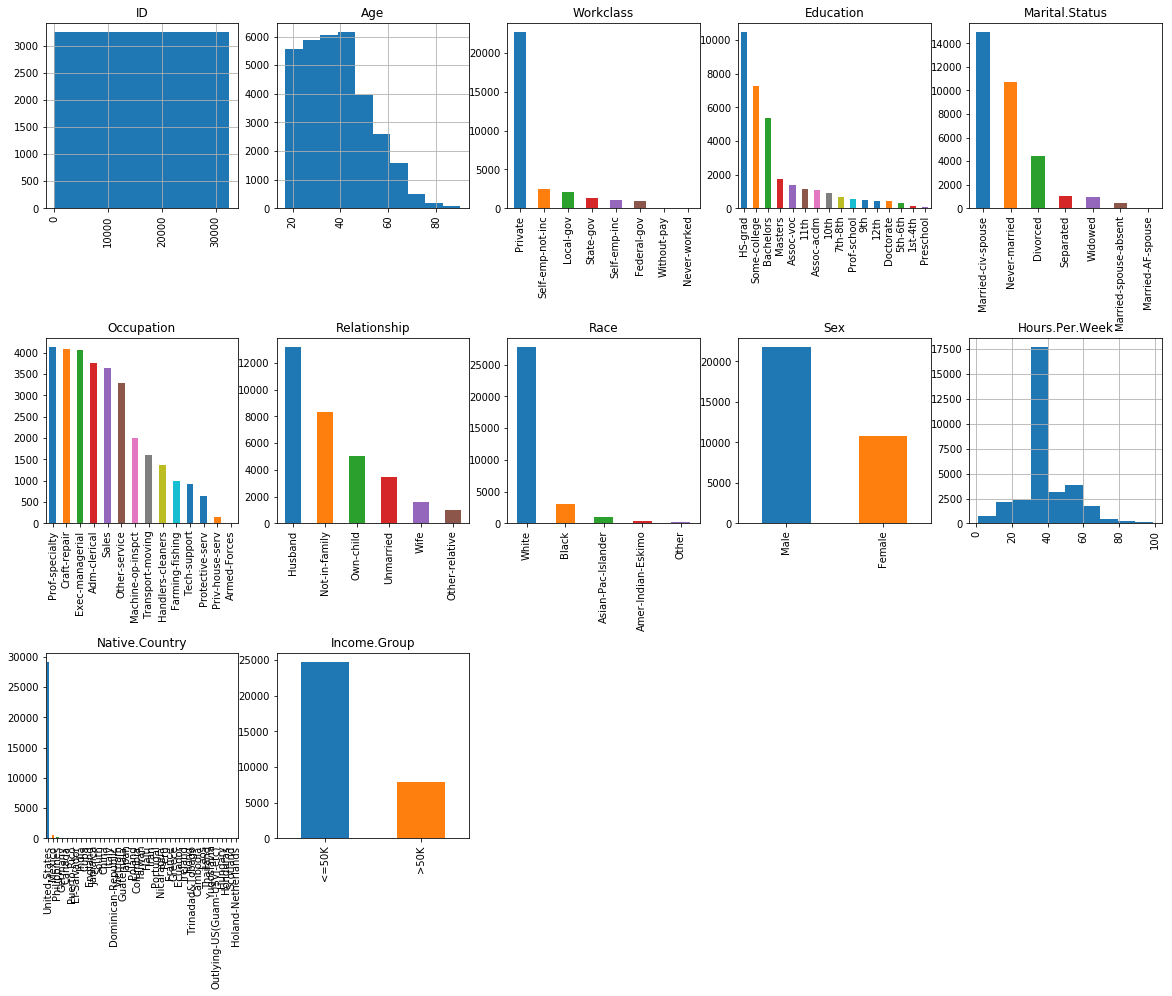

In [11]:
fig = plt.figure(figsize=(20,15))
cols = 5
rows = math.ceil(float(train.shape[1]) / cols) # rows of subplots
print('Number of rows for Subplots are : ',rows)
for i, column in enumerate(train.columns):
    print(i,'  ', column)
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if train.dtypes[column] == np.object:
        train[column].value_counts().plot(kind="bar", axes=ax)    
    else:
        train[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)
#hspace = 0.7   # the amount of height reserved for space between subplots,
               # expressed as a fraction of the average axis height
#wspace = 0.2   # the amount of width reserved for space between subplots,
               # expressed as a fraction of the average axis width

## Bar Plot

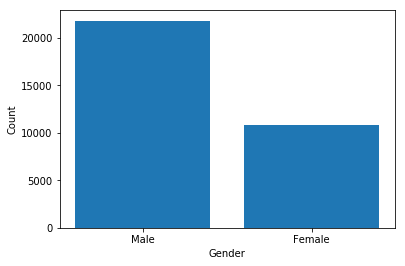

In [12]:
# Let's start by visualizing the distribution of gender in the dataset.  
fig, ax = plt.subplots()  
x = train['Sex'].unique()  
# Counting 'Males' and 'Females' in the dataset  
y = train['Sex'].value_counts()  
# Plotting the bar graph  
ax.bar(x, y)  
ax.set_xlabel('Gender')  
ax.set_ylabel('Count')  
plt.show()

/home/admin1/anaconda2/envs/python37/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


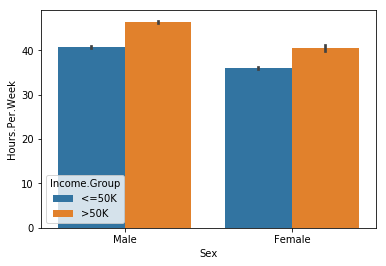

In [13]:
# For this plot, we will be using the seaborn library as it provides more flexibility with dataframes. 
# ‘hue’ is used to visualize the effect of an additional variable to the current distribution.
sns.barplot(train['Sex'], train['Hours.Per.Week'], hue=train['Income.Group'])
plt.show()

## Count Plot

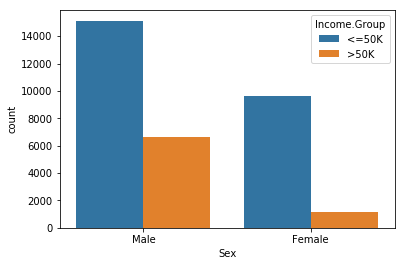

In [14]:
# ‘hue’ is used to visualize the effect of an additional variable to the current distribution.  
sns.countplot(train['Sex'], hue=train['Income.Group'])  
plt.show()

## Box Plot

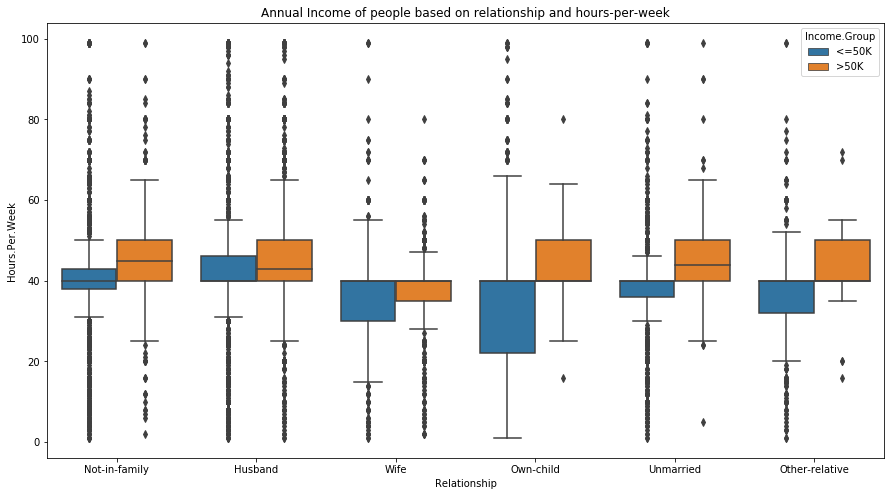

In [18]:
# Creating a box plot  
fig, ax = plt.subplots(figsize=(15, 8))  
sns.boxplot(x='Relationship', y='Hours.Per.Week', hue='Income.Group', data=train, ax=ax)  
ax.set_title('Annual Income of people based on relationship and hours-per-week')  
plt.show()

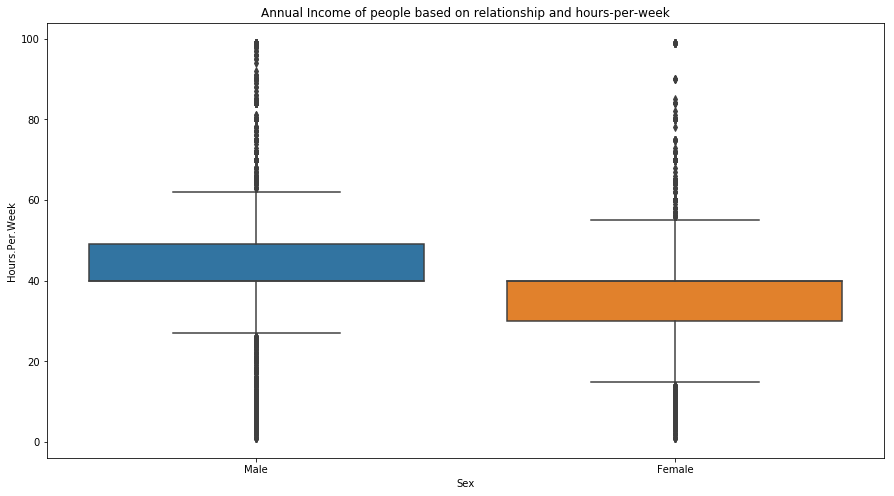

In [12]:
# Creating a box plot for comparison in Gender fields 
fig, ax = plt.subplots(figsize=(15, 8))  
sns.boxplot(x='Sex', y='Hours.Per.Week', data=train, ax=ax)  
ax.set_title('Annual Income of people based on relationship and hours-per-week')  
plt.show()

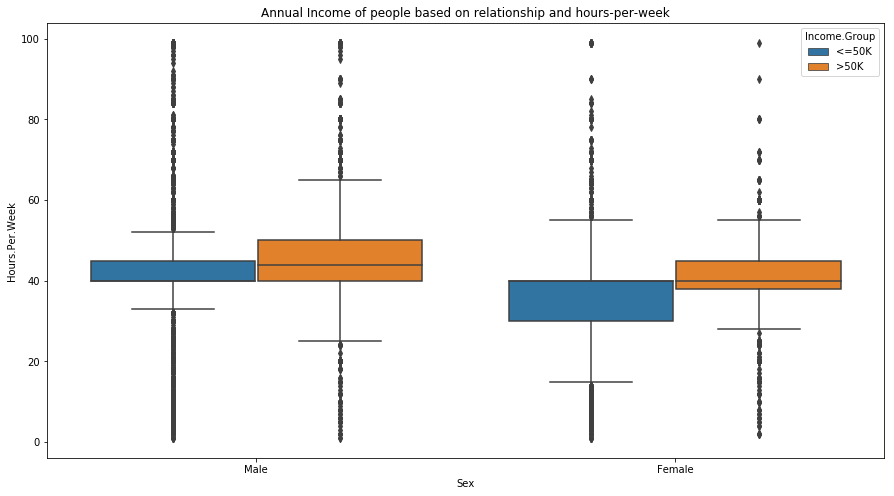

In [13]:
# Creating a box plot for comparison in Gender fields 
fig, ax = plt.subplots(figsize=(15, 8))  
sns.boxplot(x='Sex', y='Hours.Per.Week', hue='Income.Group', data=train, ax=ax)  
ax.set_title('Annual Income of people based on relationship and hours-per-week')  
plt.show()

## Strip Plot for Continous vs Categorical Variables

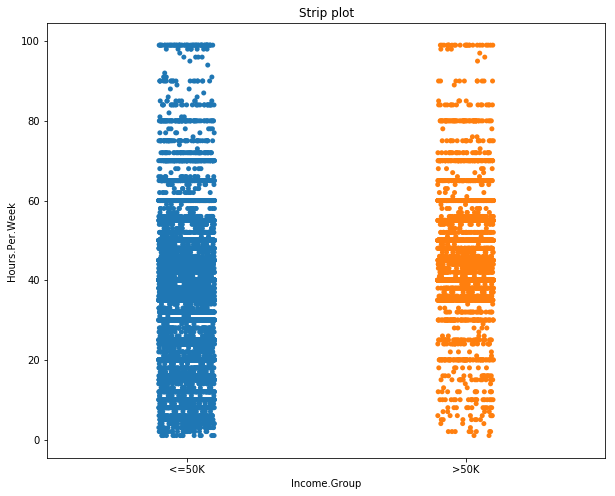

In [21]:
# Using Strip plot to visualize the data.  
fig, ax= plt.subplots(figsize=(10, 8))  
sns.stripplot(train['Income.Group'], train['Hours.Per.Week'], jitter=True, ax=ax)  
ax.set_title('Strip plot')  
plt.show()

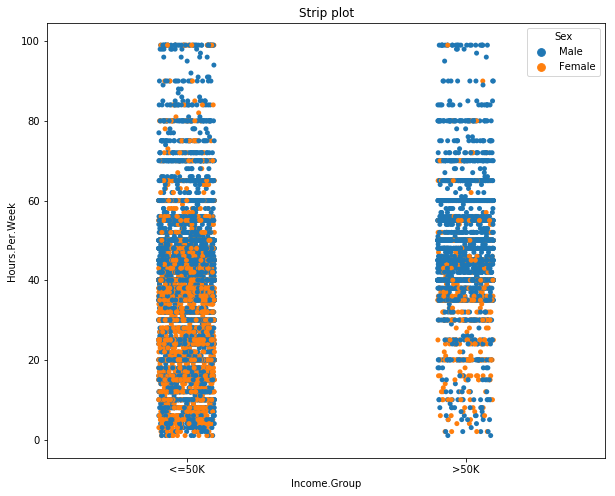

In [23]:
# Using Strip plot to visualize the data.  
fig, ax= plt.subplots(figsize=(10, 8))  
sns.stripplot(train['Income.Group'], train['Hours.Per.Week'], jitter=True, ax=ax, hue=train['Sex'])  
ax.set_title('Strip plot')  
plt.show()

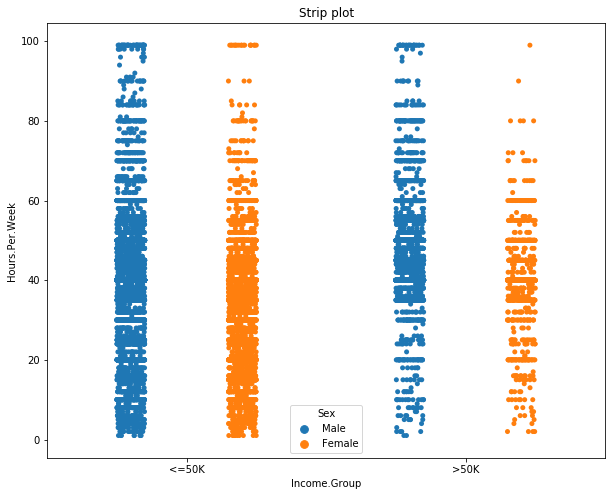

In [26]:
# Using Strip plot to visualize the data.  
fig, ax= plt.subplots(figsize=(10, 8))  
sns.stripplot(train['Income.Group'], train['Hours.Per.Week'], jitter=True, ax=ax, 
              hue=train['Sex'],dodge=True)  
ax.set_title('Strip plot')  
plt.show()

## Violin Plot

/home/admin1/anaconda2/envs/python37/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


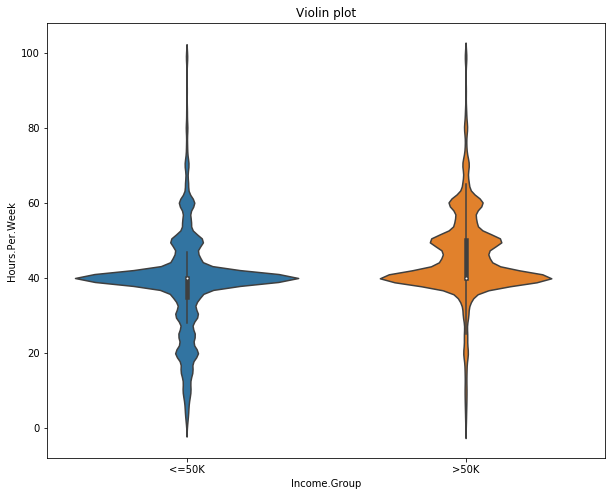

In [41]:
fig, ax = plt.subplots(figsize=(10, 8))  
sns.violinplot(x='Income.Group', y='Hours.Per.Week', data=train, ax=ax)
ax.set_title('Violin plot')  
plt.show() 

/home/admin1/anaconda2/envs/python37/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


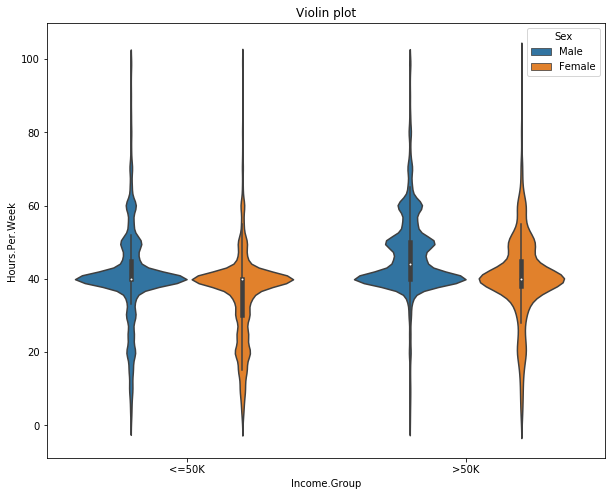

In [43]:
fig, ax = plt.subplots(figsize=(10, 8))  
sns.violinplot(x='Income.Group', y='Hours.Per.Week', hue='Sex', data=train, ax=ax)
ax.set_title('Violin plot')  
plt.show() 